<a href="https://colab.research.google.com/github/NizarMazlan/Lovathon/blob/main/LoveClockProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Selecting Which Feature Is More Significant**

In [1180]:
#importing libraries
import math
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

What one-hot encoding does is, it takes a column which has categorical data, which has been label encoded and then splits the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value.

In [1181]:
#access data
df = pd.read_csv("/content/dataset.csv")

#replace the categorical data into numerical
def gender_to_numeric(x):
  if x=='Male':
    return 0
  else:
    return 1

def academic_to_numeric(x):
  if x=='SPM' or x=='Foundation/Matriculation/STPM' or x=='Pre-Diploma/Vocational Education/Polytechnic':
    return 0
  else:
    return 1

df['Gender_Num'] = df['Gender'].apply(gender_to_numeric)
df['Academic_Num'] = df['Gender'].apply(academic_to_numeric)
df = df.drop('Gender',1)
df = df.drop('AcademicLevel', 1)


#refined dataset
LoveData = df
LoveData


,Age,AvgInteract,StdyHour,BffTime,HobbyHour,SleepHour,Gender_Num,Academic_Num
0,20,26.0,1.0,1,8,10,1,1
1,20,17.0,1.0,2,2,6,0,1
2,20,29.0,1.0,2,2,6,0,1
3,20,40.0,1.0,8,4,6,0,1
4,20,6.0,2.0,7,8,5,1,1
...,...,...,...,...,...,...,...,...
163,18,8.0,12.0,5,2,4,1,1
164,18,11.0,13.0,5,1,6,1,1
165,18,19.0,13.0,5,2,4,1,1
166,18,11.0,14.0,5,7,5,1,1


# **Finding Outlier In The Data**

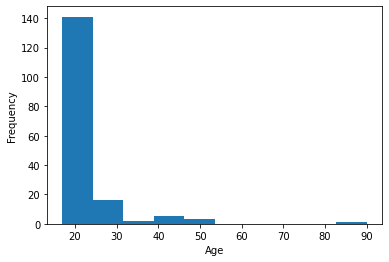

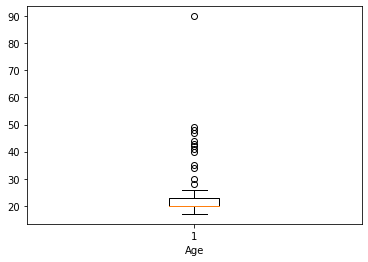

Text(0, 0.5, 'Average Interaction')

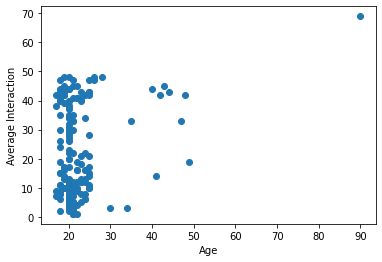

In [1182]:
#Age
pyplot.hist(LoveData.Age)
pyplot.xlabel("Age")
pyplot.ylabel("Frequency")
pyplot.show()
pyplot.boxplot(LoveData.Age)
pyplot.xlabel("Age")
pyplot.show()
pyplot.scatter(LoveData.Age, LoveData.AvgInteract)
pyplot.xlabel("Age")
pyplot.ylabel("Average Interaction")

This dataset is skewed and needed to be changed

In [1183]:
LoveData.Age.describe()

count    168.000000
mean      22.577381
std        7.731650
min       17.000000
25%       20.000000
50%       20.000000
75%       23.000000
max       90.000000
Name: Age, dtype: float64

26.0


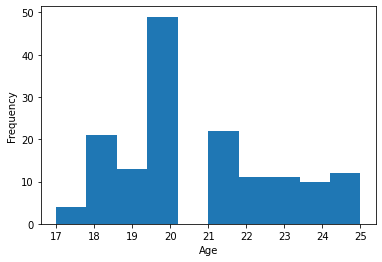

In [1184]:
#Testing how to find outliers
max_threshold = LoveData['Age'].quantile(0.92) #everything above this is considered as an outlier
print(max_threshold)
#remove all the outlier in the data
LoveData = LoveData[LoveData['Age'] < max_threshold]
pyplot.hist(LoveData.Age)
pyplot.xlabel("Age")
pyplot.ylabel("Frequency")
pyplot.show()

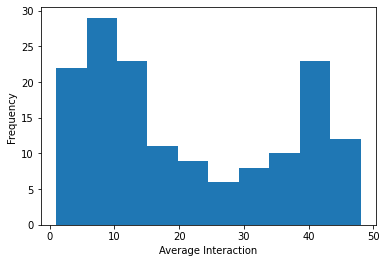

In [1185]:
#AvgInteract
pyplot.hist(LoveData.AvgInteract)
pyplot.xlabel("Average Interaction")
pyplot.ylabel("Frequency")
pyplot.show()

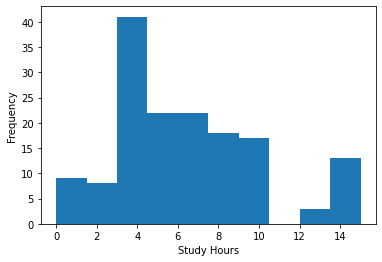

In [1186]:
#StudyHour
pyplot.hist(LoveData.StdyHour)
pyplot.xlabel("Study Hours")
pyplot.ylabel("Frequency")
pyplot.show()

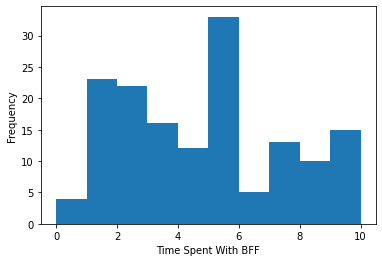

In [1187]:
#BffTime
pyplot.hist(LoveData.BffTime)
pyplot.xlabel("Time Spent With BFF")
pyplot.ylabel("Frequency")
pyplot.show()

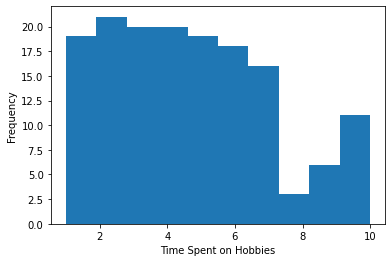

In [1188]:
#HobbyHour
pyplot.hist(LoveData.HobbyHour)
pyplot.xlabel("Time Spent on Hobbies")
pyplot.ylabel("Frequency")
pyplot.show()

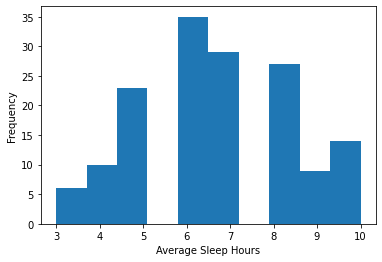

In [1189]:
#SleepHour
pyplot.hist(LoveData.SleepHour)
pyplot.xlabel("Average Sleep Hours")
pyplot.ylabel("Frequency")
pyplot.show()

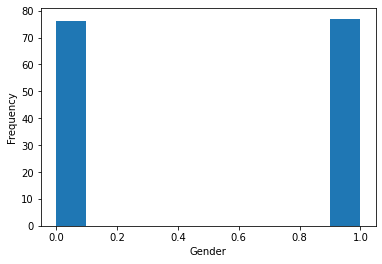

In [1190]:
#Gender
pyplot.hist(LoveData.Gender_Num)
pyplot.xlabel("Gender")
pyplot.ylabel("Frequency")
pyplot.show()

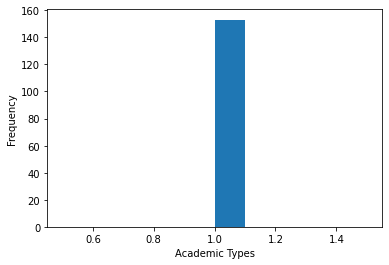

In [1191]:
#AcademicLevel
pyplot.hist(LoveData.Academic_Num)
pyplot.xlabel("Academic Types")
pyplot.ylabel("Frequency")
pyplot.show()

# **Training and Test Data**

In [1192]:
X = LoveData.drop("AvgInteract", 1)
y = LoveData["AvgInteract"]

#splitting the data
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3) #test size is 20% of the dataset

#printing the shapes of testing and training dataset
print("shape of original dataset :", LoveData.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

x_test


shape of original dataset : (153, 8)
shape of input - training set (107, 7)
shape of output - training set (107,)
shape of input - testing set (46, 7)
shape of output - testing set (46,)


,Age,StdyHour,BffTime,HobbyHour,SleepHour,Gender_Num,Academic_Num
81,24,4.0,5,3,8,0,1
159,18,9.0,6,6,9,1,1
64,22,7.0,3,4,6,1,1
94,25,6.0,4,1,7,1,1
21,20,5.0,10,5,8,0,1
8,20,3.0,3,9,7,0,1
95,25,6.0,1,4,6,0,1
166,18,14.0,5,7,5,1,1
15,20,4.0,10,10,7,0,1
55,21,9.0,1,3,5,1,1


# **Selecting Feature and Testing Model**

## **Linear Regression Feature Importance**

In [1193]:
#define the model
model = LinearRegression()
#fit the model
model.fit(x_train,y_train)
#get importance
importance = model.coef_
#summarize feature importance
for i,v in enumerate(importance):
  print('Feature : %0d, Score: %.5f' % (i,v))

Feature : 0, Score: -0.85302
Feature : 1, Score: 0.31438
Feature : 2, Score: -0.72055
Feature : 3, Score: 0.75262
Feature : 4, Score: -0.02383
Feature : 5, Score: -1.59122
Feature : 6, Score: 0.00000


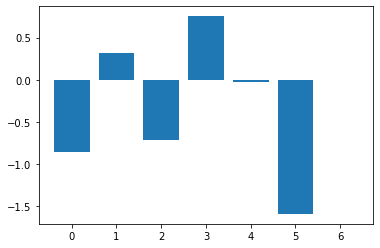

In [1194]:
#plotting the feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## **CART Regression Feature Importance**

In [1195]:
#define the model
model = DecisionTreeRegressor()
#fit the model
model.fit(x_train,y_train)
#get importance
importance = model.feature_importances_
#summarize feature importance
for i,v in enumerate(importance):
  print('Feature : %0d, Score: %.5f' % (i,v))

Feature : 0, Score: 0.19492
Feature : 1, Score: 0.26865
Feature : 2, Score: 0.20028
Feature : 3, Score: 0.17338
Feature : 4, Score: 0.14964
Feature : 5, Score: 0.01314
Feature : 6, Score: 0.00000


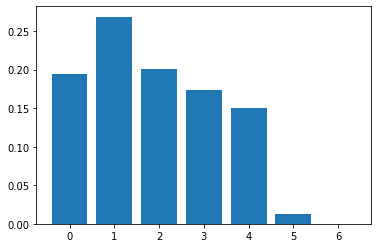

In [1196]:
#plotting the feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## **Random Forest Regression Feature Importance**

In [1197]:
#Finding MAE value
#define the model
model = RandomForestRegressor()
#fit the model
model.fit(x_train,y_train)
#get importance
importance = model.feature_importances_
#summarize feature importance
for i,v in enumerate(importance):
  print('Feature : %0d, Score: %.5f' % (i,v))

Feature : 0, Score: 0.15956
Feature : 1, Score: 0.26763
Feature : 2, Score: 0.18036
Feature : 3, Score: 0.19143
Feature : 4, Score: 0.17095
Feature : 5, Score: 0.03007
Feature : 6, Score: 0.00000


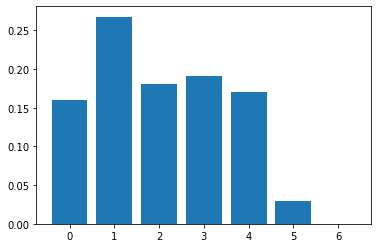

In [1198]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## **XGBoost Regression Feature Importance**

In [1199]:
#define the model
model = XGBRegressor()
#fit the model
model.fit(x_train,y_train)
#get importance
importance = model.feature_importances_
#summarize feature importance
for i,v in enumerate(importance):
  print('Feature : %0d, Score: %.5f' % (i,v))

[10:26:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature : 0, Score: 0.14875
Feature : 1, Score: 0.21506
Feature : 2, Score: 0.19255
Feature : 3, Score: 0.16145
Feature : 4, Score: 0.13913
Feature : 5, Score: 0.14306
Feature : 6, Score: 0.00000


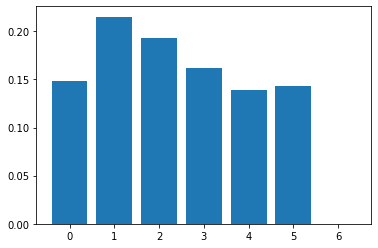

In [1200]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## **Permutation Feature Importance**

In [1201]:
#define the model
model = KNeighborsRegressor()
#fit the model
model.fit(x_train,y_train)
# perform permutation importance
results = permutation_importance(model, x_train,y_train, scoring='neg_mean_squared_error')
#get importance
importance = results.importances_mean
#summarize feature importance
for i,v in enumerate(importance):
  print('Feature : %0d, Score: %.5f' % (i,v))

Feature : 0, Score: 27.51890
Feature : 1, Score: 40.10675
Feature : 2, Score: 21.42834
Feature : 3, Score: 41.62191
Feature : 4, Score: 25.07955
Feature : 5, Score: 4.16576
Feature : 6, Score: 0.00000


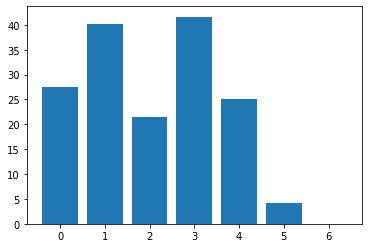

In [1202]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# **MAE Values**

In [1203]:
#LinearRegression
X = x_train.drop("Age",1)
X = X.drop("Academic_Num",1)
X = X.drop("SleepHour",1)
X = X.drop("BffTime",1)
X = X.drop("StdyHour",1)
X = X.drop("HobbyHour", 1)
y = y_train

model = LinearRegression()
model.fit(X,y)
#Finding MAE value
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect results
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -13.862 (1.894)


In [1204]:
#CART
X = x_train.drop("Gender_Num",1)
y = y_train

model = DecisionTreeRegressor()
model.fit(X,y)
#Finding MAE value
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect results
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -14.702 (3.513)


In [1205]:
#Random Forest
X = x_train.drop("Gender_Num",1)
X = X.drop("Academic_Num",1)
y = y_train

model = RandomForestRegressor()
model.fit(X,y)
#Finding MAE value
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect results
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -13.584 (2.919)


In [1206]:
#XGBoost
X = x_train.drop("HobbyHour",1)
y = y_train

model = XGBRegressor()
model.fit(X,y)
#Finding MAE value
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect results
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

[10:26:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: -13.835 (3.027)


In [1207]:
#Permutation
X = x_train.drop("Gender_Num",1)
X = X.drop("Academic_Num",1)
y = y_train

model = KNeighborsRegressor()
model.fit(X,y)
#Finding MAE value
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect results
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -14.403 (1.715)


# **Fitting The Random Forest Regression Model**

In [1208]:
#Random Forest Regression
X = x_train.drop("Gender_Num",1)
X = X.drop("Academic_Num",1)
y = y_train

#Dropping features in the test dataset
X_test = x_test.drop("Gender_Num",1)
X_test = X_test.drop("Academic_Num",1)

#Fitting Random Forest Regression to the dataset
model = RandomForestRegressor()
model.fit(X,y)

#Predicting the result
y_pred = model.predict(X_test)

#Comparison dataframe
pred_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred.reshape(-1)})
#calculate accuracy
errors = abs(y_pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('Initial model achieves on the test set an accuracy of', round(accuracy, 2),'%')


Initial model achieves on the test set an accuracy of -45.26 %


### **Fine Tuning the Random Forest Model**
Searching for best hyperparameters


Grid Search 

In [1209]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25],
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(RandomForestRegressor(), param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X,y)


cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


16.169817611868208 {'bootstrap': True, 'max_depth': 10, 'n_estimators': 10}
16.16604994279311 {'bootstrap': True, 'max_depth': 10, 'n_estimators': 25}
15.682415959079618 {'bootstrap': True, 'max_depth': 50, 'n_estimators': 10}
15.977602151288588 {'bootstrap': True, 'max_depth': 50, 'n_estimators': 25}
16.52143944288237 {'bootstrap': True, 'max_depth': None, 'n_estimators': 10}
16.350102638261905 {'bootstrap': True, 'max_depth': None, 'n_estimators': 25}
18.754677408172103 {'bootstrap': False, 'max_depth': 10, 'n_estimators': 10}
18.73373897700997 {'bootstrap': False, 'max_depth': 10, 'n_estimators': 25}
18.972403636531528 {'bootstrap': False, 'max_depth': 50, 'n_estimators': 10}
18.892101750881412 {'bootstrap': False, 'max_depth': 50, 'n_estimators': 25}
18.8768789485546 {'bootstrap': False, 'max_depth': None, 'n_estimators': 10}
18.958169124829976 {'bootstrap': False, 'max_depth': None, 'n_estimators': 25}


In [1210]:
#find the best model of grid search
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [1211]:
# Performance metrics
grid_best= grid_search_forest.best_estimator_.predict(X)
errors = abs(grid_best - y)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')

The best model from grid-search has an accuracy of 38.57 %


# **Evaluating The Model On The Test Set**

In [1212]:
final_model = grid_search_forest.best_estimator_
# Predicting test set results
final_pred = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
print('The final RMSE on the test set is', round(final_rmse, 2))


The final RMSE on the test set is 16.07


In [1213]:
#calculate accuracy
errors = abs(final_pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model achieves on the test set an accuracy of', round(accuracy, 2),'%')

The best model achieves on the test set an accuracy of -48.93 %


# **Visualization of Random Forest Hyperparameters**

Text(0.5, 0, 'Tree depth')

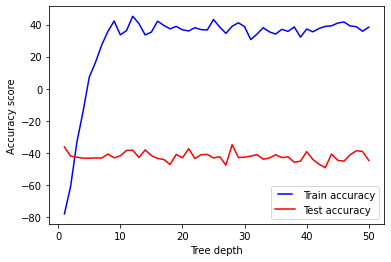

In [1214]:
max_depths = np.linspace(1, 50, 50, endpoint=True)

train_results = []
test_results = []

for i in max_depths:
    dt = RandomForestRegressor(max_depth=i)
    dt.fit(X, y)    
    #compute accuracy for train data
    housing_tree = dt.predict(X)
    errors = abs(housing_tree - y)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    #append results of accuracy
    train_results.append(accuracy)
    
    #now again for test data
    housing_tree = dt.predict(X_test)
    errors = abs(housing_tree - y_test)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_test)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    #append results of accuracy
    test_results.append(accuracy)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = pyplot.plot(max_depths, train_results, 'b', label='Train accuracy')
line2, = pyplot.plot(max_depths, test_results, 'r', label= 'Test accuracy')

pyplot.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
pyplot.ylabel('Accuracy score')
pyplot.xlabel('Tree depth')